In [722]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

the goal of this project is to analyze student test performance

1. pick any school in this dataset as an initial comparison point: Bronx High School of Science

pick a feature/measure/score: Living Environment Regents Mean Score

compare above school to schools in the entire dataset, schools in a
particular borough, or schools in a particular district - you only need
to do one additional comparison point (but you’re welcome to do
more comparisons if you feel compelled to do so): Compared with all other Bronx High Schools Mean Living Environment Score

the analysis should include some descriptive statistics: means, standard deviation, max and min

the analysis should include one cleaning task (or more): Filtered rows, got rid of empty cells ('s') in score column

the analysis should include one visualization (or more)- bar graph- with and without labels

In [723]:
dfp1 = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')


Filtered Columns - Only Looking at Mean Score

In [724]:
dfp1s = dfp1[['School DBN', 'Total Tested','Regents Exam','Mean Score','School Name','Year']]

In [725]:
dfp1s.head(5)

,School DBN,Total Tested,Regents Exam,Mean Score,School Name,Year
0,01M034,4,Common Core Algebra,s,P.S. 034 Franklin D. Roosevelt,2017
1,01M034,16,Living Environment,77.9,P.S. 034 Franklin D. Roosevelt,2015
2,01M034,9,Living Environment,74,P.S. 034 Franklin D. Roosevelt,2016
3,01M140,3,Common Core Algebra,s,P.S. 140 Nathan Straus,2016
4,01M140,2,Common Core Algebra,s,P.S. 140 Nathan Straus,2017


Filtered Rows: Only 2017,
Only the Bronx,
Only Living Environment Exam,
Only If Total Tested was more than 1,
Dropped rows that had 's' instead of mean score

In [726]:
df2017 = dfp1s[dfp1s["Year" ]> 2016]
dfBronx = df2017.loc[dfp1s["School DBN"].str.contains("X")]
dfBronxLE = dfBronx.loc[dfBronx["Regents Exam"].str.contains("Living")]
dfBronxLE = dfBronxLE[dfBronxLE["Total Tested" ]>1]
dfBronxLE = dfBronxLE.loc[dfBronxLE["Mean Score"] != 's']

Check if Bronx High School of Sciece is in DF

In [727]:
dfBronxLE.loc[dfBronxLE["School Name"] == 'Bronx High School of Science']

,School DBN,Total Tested,Regents Exam,Mean Score,School Name,Year
6852,10X445,444,Living Environment,92.5,Bronx High School of Science,2017
31875,10X445,437,Living Environment,92.5,Bronx High School of Science,2017
31876,10X445,7,Living Environment,91.4,Bronx High School of Science,2017
71837,10X445,334,Living Environment,92.6,Bronx High School of Science,2017
71838,10X445,110,Living Environment,92.1,Bronx High School of Science,2017
115907,10X445,179,Living Environment,92.3,Bronx High School of Science,2017
115908,10X445,265,Living Environment,92.5,Bronx High School of Science,2017
165440,10X445,247,Living Environment,91.7,Bronx High School of Science,2017
165441,10X445,16,Living Environment,92.1,Bronx High School of Science,2017
165442,10X445,34,Living Environment,93.7,Bronx High School of Science,2017


Check. of data types

In [728]:
dfBronxLE.dtypes

School DBN      object
Total Tested     int64
Regents Exam    object
Mean Score      object
School Name     object
Year             int64
dtype: object

Change of mean score to float and Year to string

In [729]:
dfBronxLE["Mean Score"] = dfBronxLE["Mean Score"].apply(float)
dfBronxLE["Year"] = dfBronxLE["Year"].apply(str)



> Check for missing data



In [730]:
dfBronxLE.isnull().sum().sum()

0

 Column to Create Category of BH of Science to Alll other Bronx Schools

In [731]:
dfBronxLE['School Compare'] = np.where(dfBronxLE['School Name'] == "Bronx High School of Science", 'Science', 'Other Bronx School')


Summary Statistics By Category

In [732]:
dfBronxLE.groupby(['School Compare']).describe()

Total Tested                                            \
                          count        mean         std  min   25%    50%   
School Compare                                                              
Other Bronx School       1615.0   54.347368   50.814116  6.0  19.5   39.0   
Science                    12.0  185.000000  160.457868  7.0  29.5  155.0   

                                  Mean Score                                   \
                       75%    max      count       mean       std   min   25%   
School Compare                                                                  
Other Bronx School   77.00  645.0     1615.0  64.627121  7.953483  44.0  59.5   
Science             282.25  444.0       12.0  92.525000  0.704692  91.4  92.1   

                                       
                     50%    75%   max  
School Compare                         
Other Bronx School  63.8  69.25  92.3  
Science             92.5  92.80  93.7

Calculation of Weighted Mean (mean based on # of students within school)

In [733]:
dfBronxLE['School Total'] = ((dfBronxLE['Mean Score']*dfBronxLE['Total Tested']))
dfBronxLESum = dfBronxLE.groupby(['School Compare']).agg({'Total Tested':'sum','Mean Score':'mean','School Total':'sum', })
dfBronxLESum['SchoolWeightedMean'] = ((dfBronxLESum['School Total']/dfBronxLESum['Total Tested']))
print(dfBronxLESum)


                    Total Tested  Mean Score  School Total  SchoolWeightedMean
School Compare                                                                
Other Bronx School         87771   64.627121     5660072.0           64.486812
Science                     2220   92.525000      205266.6           92.462432


Creation of Dat Subset and Plot

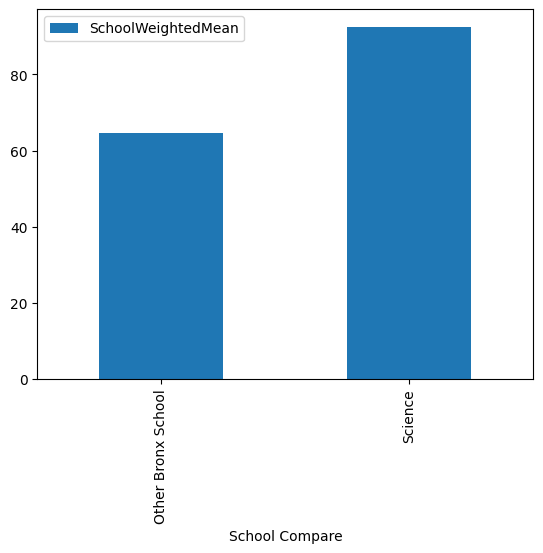

In [734]:
dfSchoolMean = dfBronxLESum[['SchoolWeightedMean']].plot(kind="bar")


I couldn't figure out how to make the group by category a column in the dataset so I created a data set with the weighted mean just for the question of Interest so I could create a prettier graph

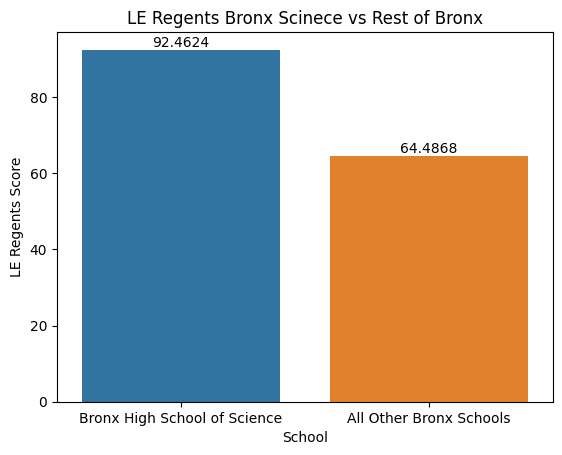

In [743]:

data = [['Bronx High School of Science', 92.462432], ['All Other Bronx Schools', 64.486812]]
df = pd.DataFrame(data, columns=['School', 'LE Regents Score'])
ax = sns.barplot(x = 'School', y = 'LE Regents Score',data = df)
ax.bar_label(ax.containers[0])

ax.set_title('LE Regents Bronx Science vs Rest of Bronx')
plt.show()

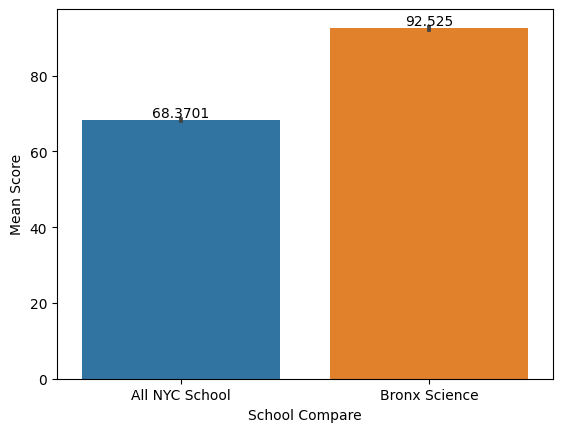

In [736]:
df2017 = dfp1s[dfp1s["Year" ]> 2016]
dfAll = df2017.loc[df2017["Regents Exam"].str.contains("Living")]
dfAll= dfAll.loc[dfAll["Mean Score"] != 's']
dfAll["Mean Score"] = dfAll["Mean Score"].apply(float)
dfAll['School Compare'] = np.where(dfAll['School Name'] == "Bronx High School of Science", 'Bronx Science', 'All NYC School')
ax = sns.barplot(x = 'School Compare', y = 'Mean Score',data = dfAll)
ax.bar_label(ax.containers[0])
plt.show()
